In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore, pearsonr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
# Step 1: CSV Parsing
# Load the dataset
train_data = pd.read_csv("/Users/nissanthneelakandanabirami/Downloads/dry_bean_classification_train.csv")
test_data = pd.read_csv("/Users/nissanthneelakandanabirami/Downloads/dry_bean_classification_test.csv")

In [36]:
train_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,SEKER
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,BARBUNYA
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,SEKER
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,SEKER
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,34948,697.453,264.444305,168.744463,1.567129,0.769946,35262,210.943536,0.700417,0.991095,0.902822,0.797686,0.007567,0.001890,0.636303,0.997169,DERMASON
10885,45550,797.549,296.932493,196.391957,1.511938,0.750031,46093,240.823714,0.775662,0.988219,0.899878,0.811039,0.006519,0.001740,0.657784,0.994528,SIRA
10886,27409,641.327,232.735907,150.457291,1.546857,0.762938,27842,186.810660,0.794464,0.984448,0.837421,0.802672,0.008491,0.002174,0.644283,0.996613,DERMASON
10887,38487,732.235,281.095672,174.608613,1.609861,0.783675,38860,221.366597,0.741389,0.990401,0.902034,0.787513,0.007304,0.001733,0.620177,0.998400,DERMASON


In [37]:
train_data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'DERMASON', 'CALI', 'BOMBAY', 'SIRA', 'HOROZ'],
      dtype=object)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10889 non-null  int64  
 1   Perimeter        10889 non-null  float64
 2   MajorAxisLength  10889 non-null  float64
 3   MinorAxisLength  10889 non-null  float64
 4   AspectRation     10889 non-null  float64
 5   Eccentricity     10889 non-null  float64
 6   ConvexArea       10889 non-null  int64  
 7   EquivDiameter    10889 non-null  float64
 8   Extent           10889 non-null  float64
 9   Solidity         10889 non-null  float64
 10  roundness        10889 non-null  float64
 11  Compactness      10889 non-null  float64
 12  ShapeFactor1     10889 non-null  float64
 13  ShapeFactor2     10889 non-null  float64
 14  ShapeFactor3     10889 non-null  float64
 15  ShapeFactor4     10889 non-null  float64
 16  Class            10889 non-null  object 
dtypes: float64(1

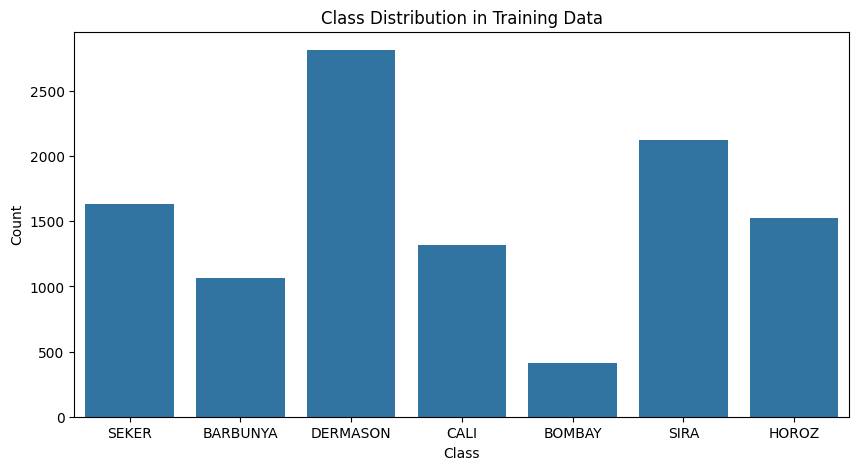

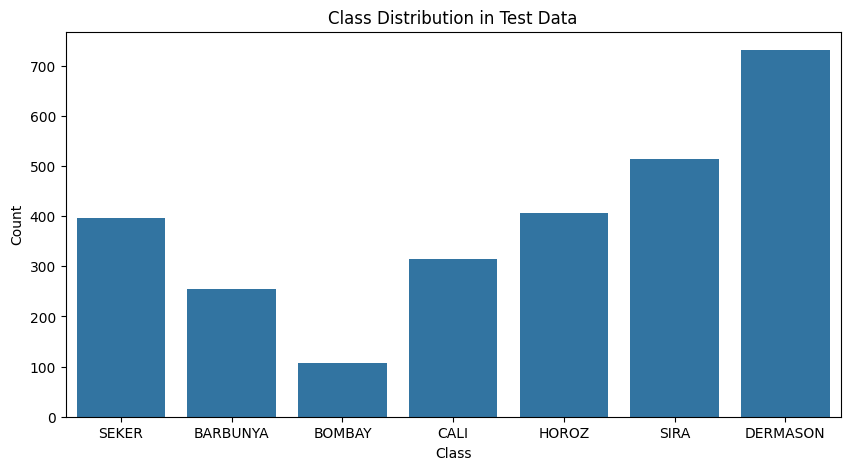

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='Class')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=test_data, x='Class')
plt.title('Class Distribution in Test Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

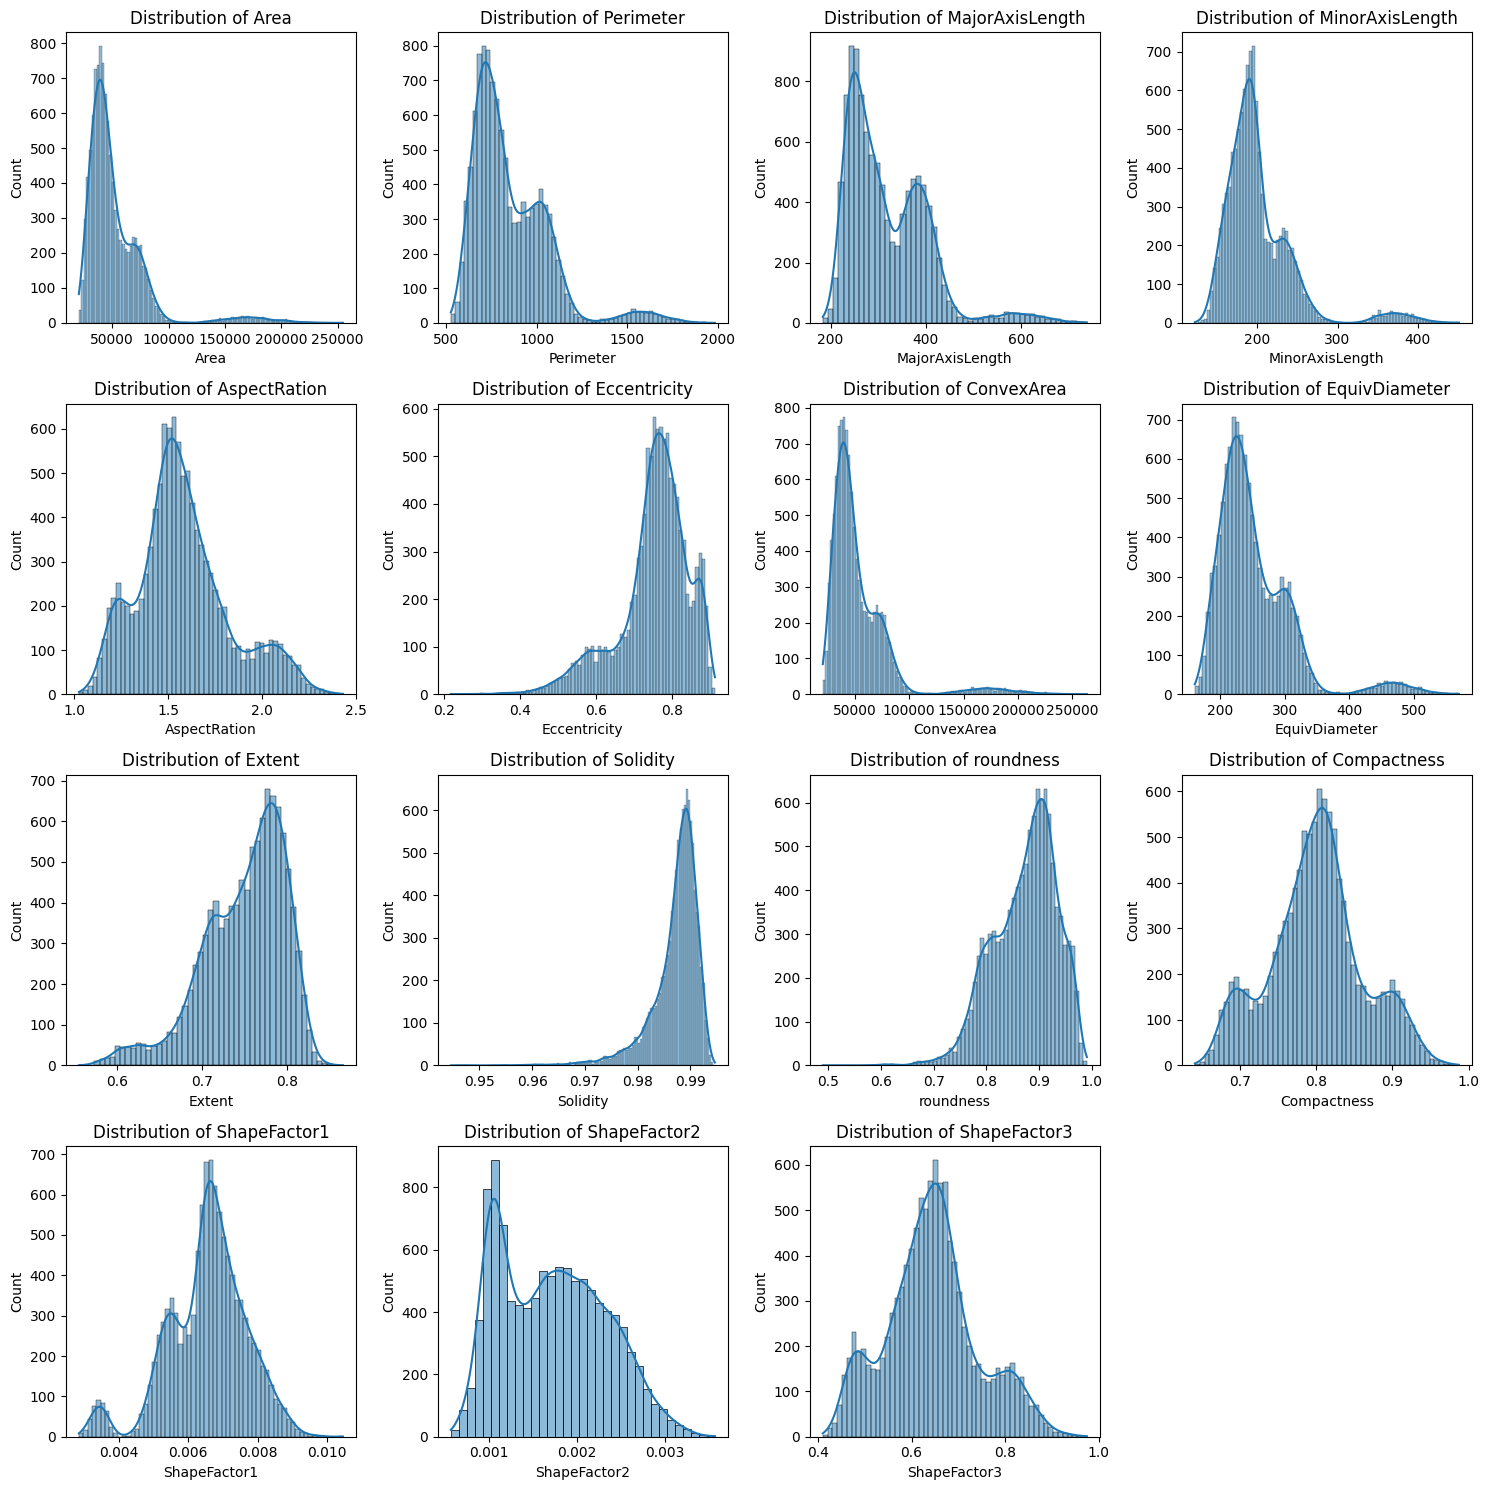

In [40]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create histograms for numerical features
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(numerical_features[:-1], start=1):  # Exclude 'class' feature
    plt.subplot(4, 4, idx)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

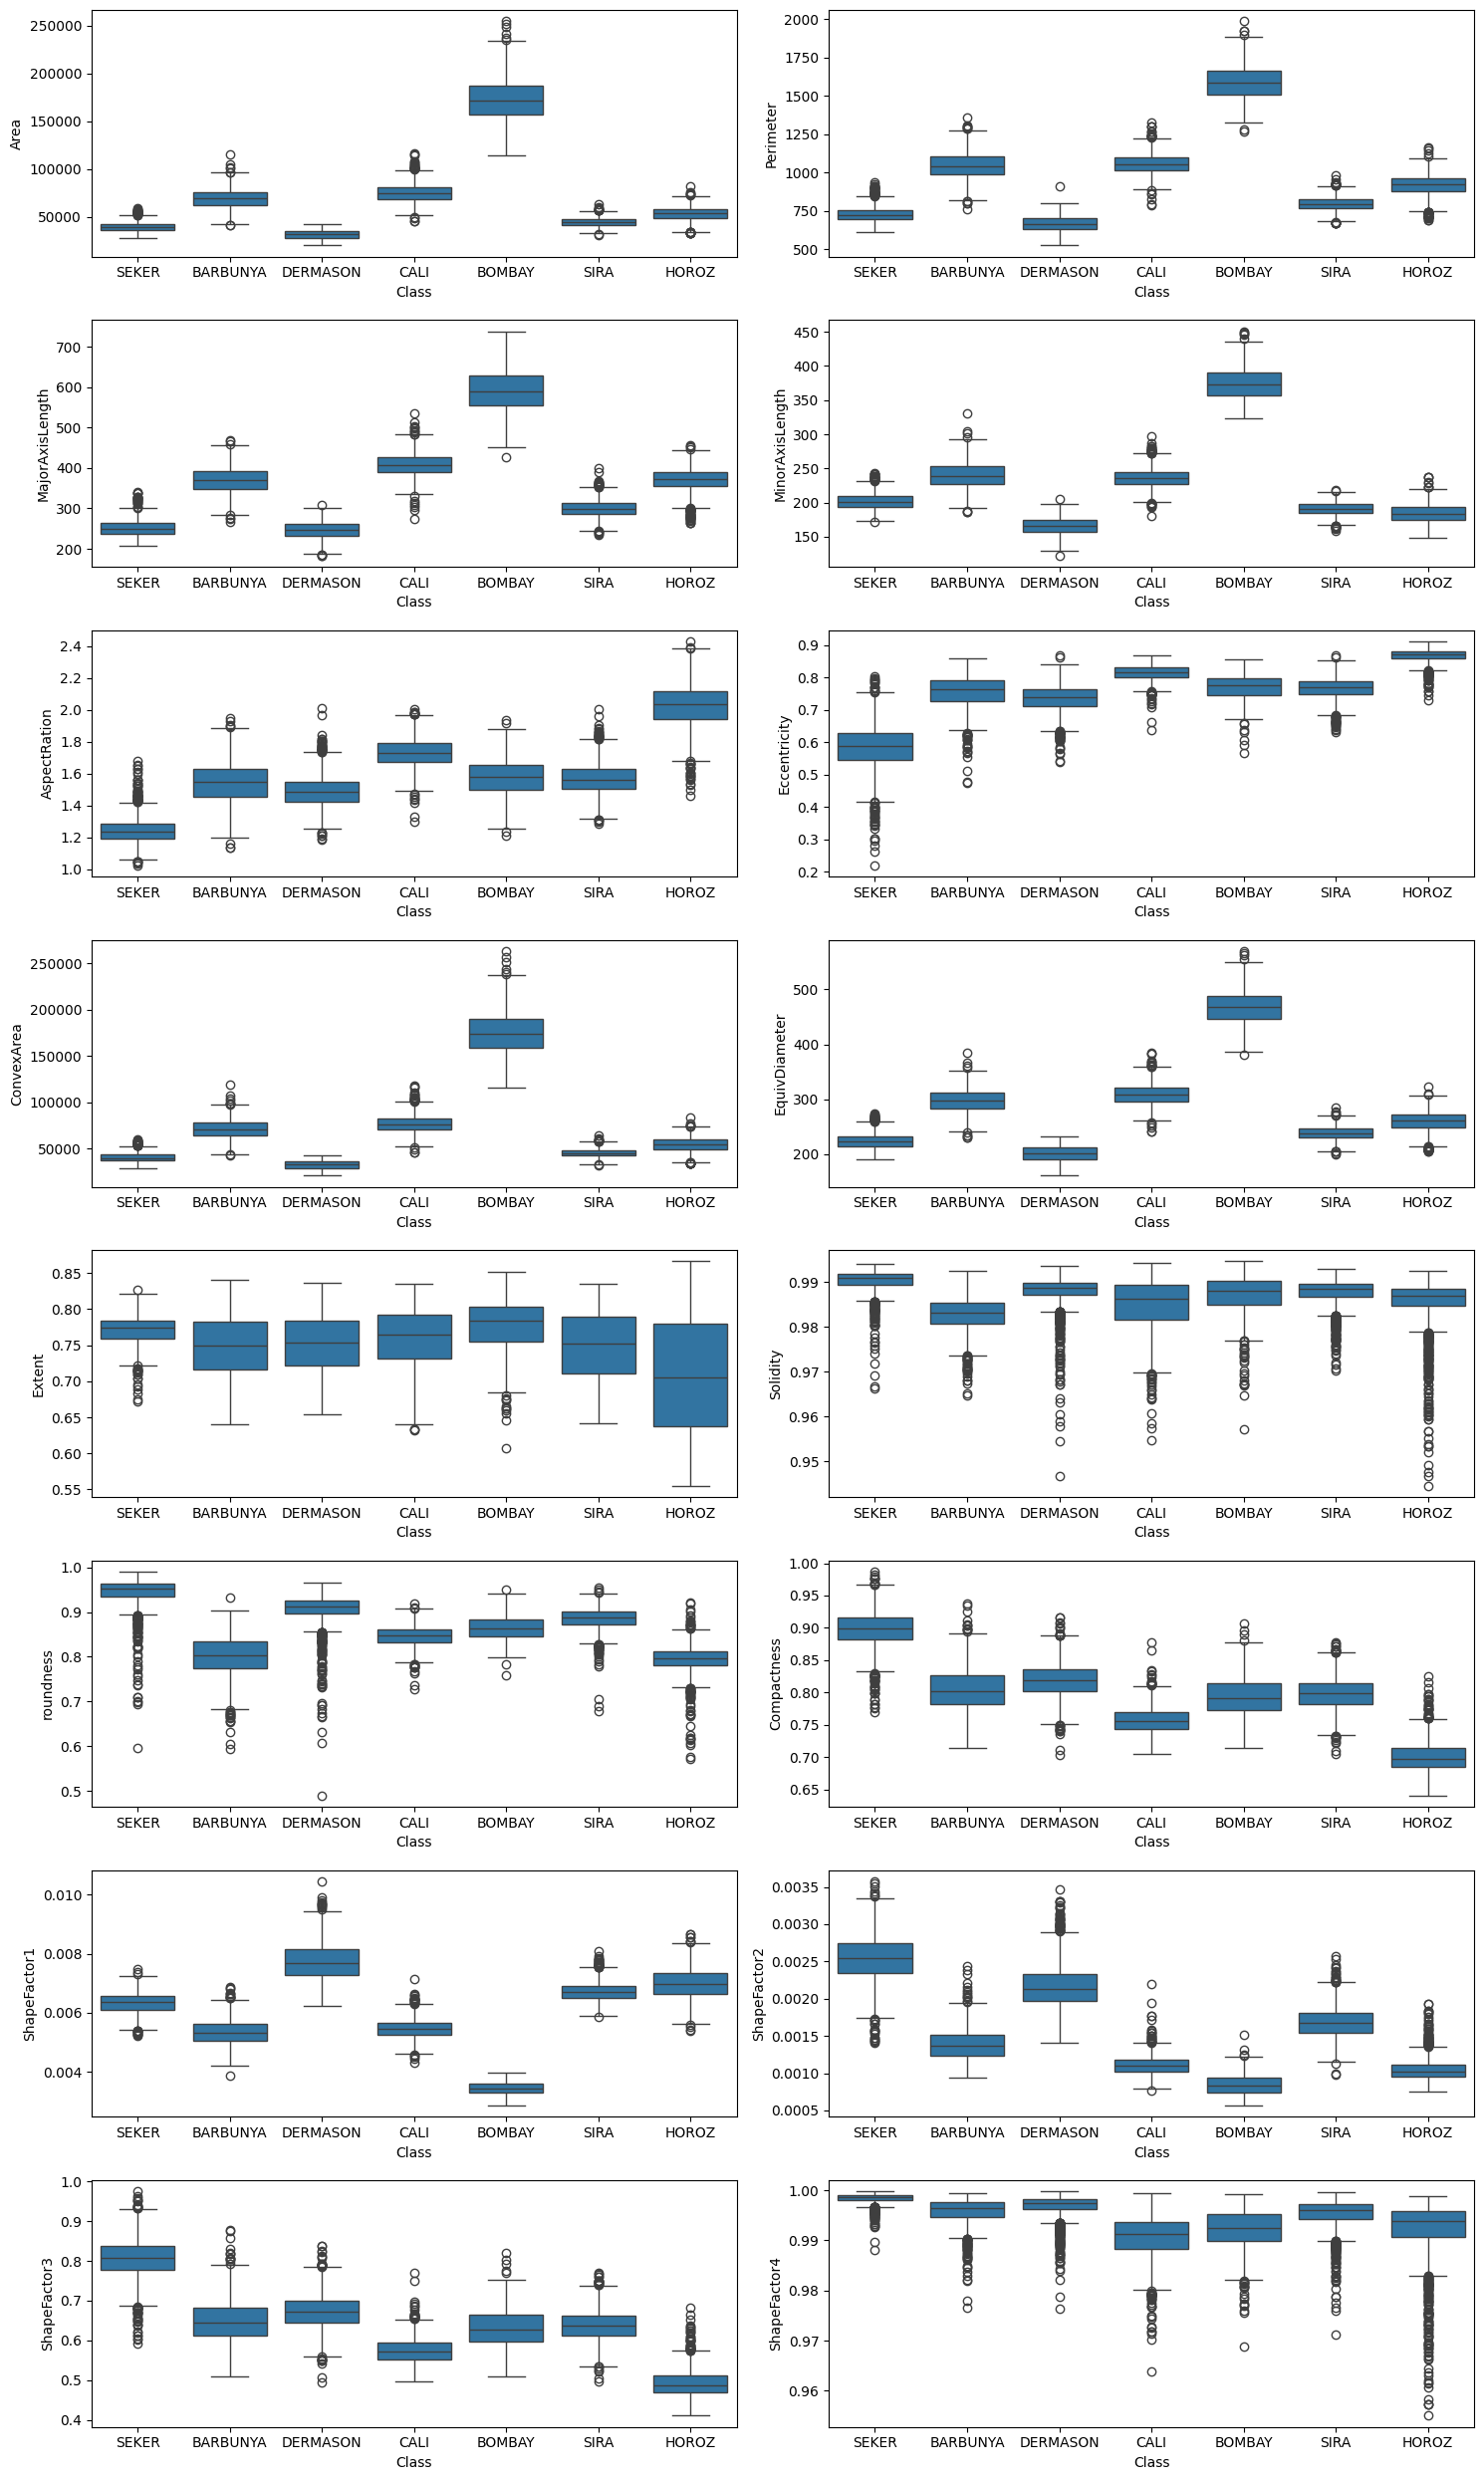

In [41]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(x=train_data['Class'], y= train_data[variable], ax=subplot)
plt.tight_layout()

In [42]:
missing_values_per_column = train_data.isnull().sum()

total_missing_values = train_data.isnull().sum().sum()

print("Missing values per column:\n", missing_values_per_column)
print("Total missing values:", total_missing_values)


Missing values per column:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Total missing values: 0


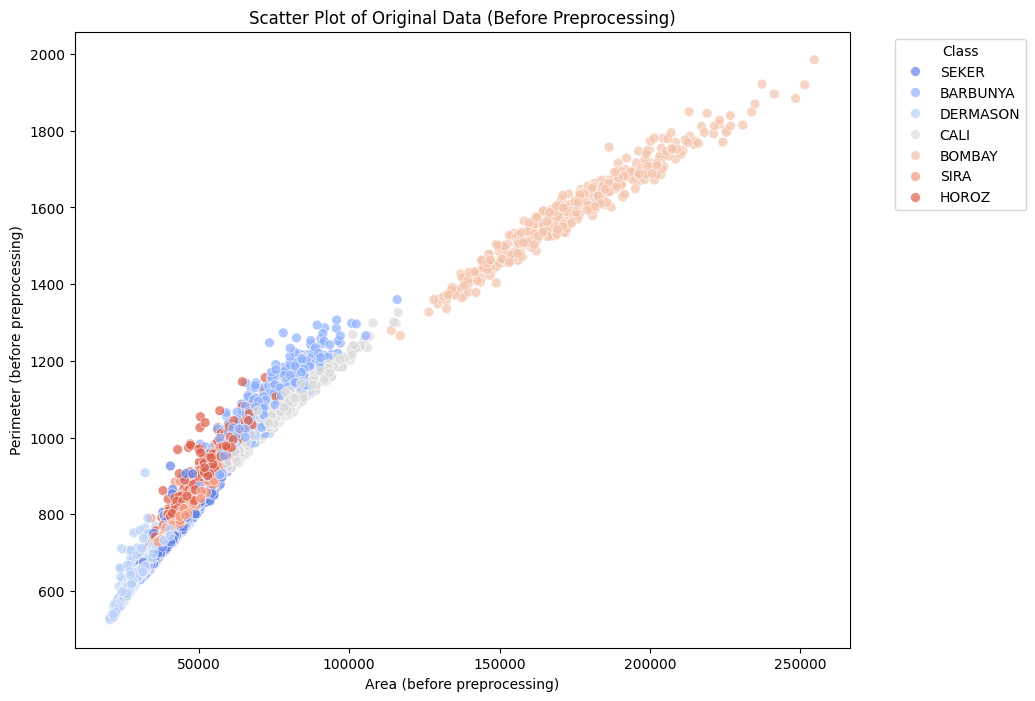

In [43]:
# Create a scatter plot for the original data
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=train_data['Area'],  # Feature on the x-axis
    y=train_data['Perimeter'],  # Feature on the y-axis
    hue=train_data['Class'],  # Color by class
    palette='coolwarm',  # Color palette
    s=50,  # Size of the scatter points
    alpha=0.7  # Transparency
)

plt.xlabel("Area (before preprocessing)")
plt.ylabel("Perimeter (before preprocessing)")
plt.title("Scatter Plot of Original Data (Before Preprocessing)")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

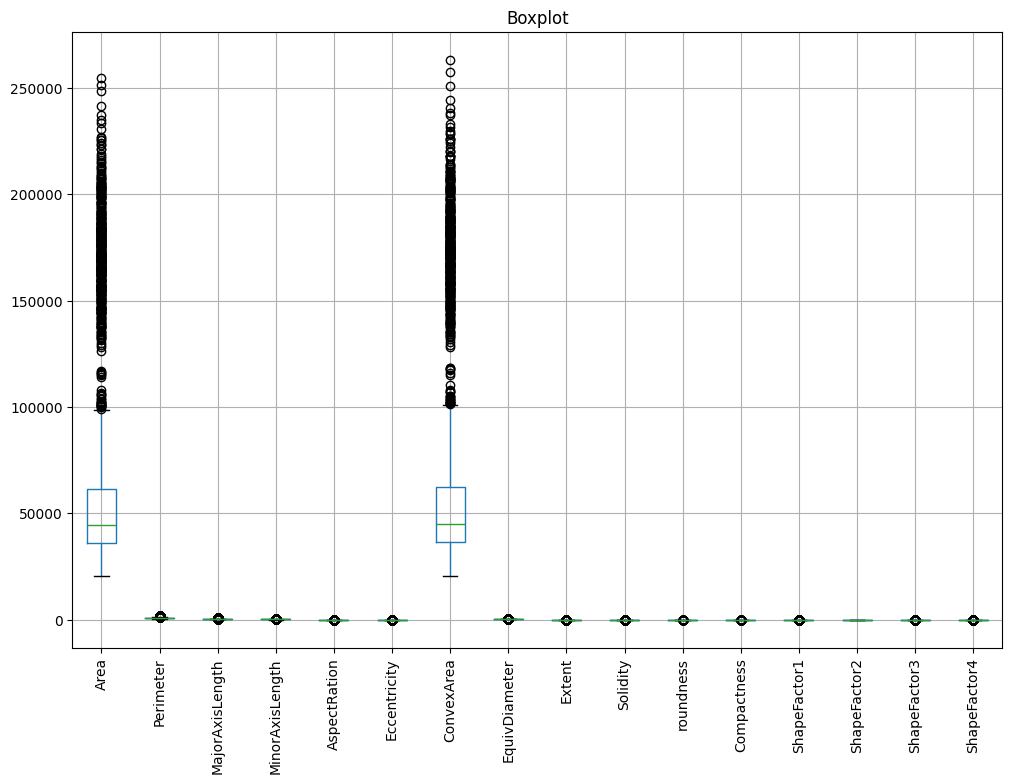

In [44]:
train_data.boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title("Boxplot")
plt.show()

In [45]:
from scipy import stats
from sklearn.impute import SimpleImputer

def replace_outliers_with_nan_zscore(data, feature, threshold=3):
    z_scores = stats.zscore(data[feature])
    outliers = (np.abs(z_scores) > threshold)
    data.loc[outliers, feature] = np.nan  

for feature in numerical_features[:-1]: 
    replace_outliers_with_nan_zscore(train_data, feature, threshold=3)

imputer = SimpleImputer(strategy='mean')
train_data_imputed = train_data.copy() 
train_data_imputed[numerical_features[:-1]] = imputer.fit_transform(train_data_imputed[numerical_features[:-1]])

train_data_imputed  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339.0,741.226,260.199330,207.306394,1.255144,0.604347,42676.0,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,SEKER
1,68247.0,1088.754,370.368146,237.863792,1.557060,0.766507,70172.0,294.779204,0.767683,0.987498,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,BARBUNYA
2,37856.0,708.716,248.430330,194.360324,1.278195,0.622835,38232.0,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,SEKER
3,33143.0,648.385,222.526309,189.737379,1.172812,0.522480,33377.0,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,SEKER
4,29925.0,647.570,237.714031,161.004849,1.476440,0.735703,30321.0,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,34948.0,697.453,264.444305,168.744463,1.567129,0.769946,35262.0,210.943536,0.700417,0.991095,0.902822,0.797686,0.007567,0.001890,0.636303,0.997169,DERMASON
10885,45550.0,797.549,296.932493,196.391957,1.511938,0.750031,46093.0,240.823714,0.775662,0.988219,0.899878,0.811039,0.006519,0.001740,0.657784,0.994528,SIRA
10886,27409.0,641.327,232.735907,150.457291,1.546857,0.762938,27842.0,186.810660,0.794464,0.984448,0.837421,0.802672,0.008491,0.002174,0.644283,0.996613,DERMASON
10887,38487.0,732.235,281.095672,174.608613,1.609861,0.783675,38860.0,221.366597,0.741389,0.990401,0.902034,0.787513,0.007304,0.001733,0.620177,0.998400,DERMASON


In [46]:
numerical_features_test = test_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for feature in numerical_features_test[:-1]:  # Excluding 'class'
    replace_outliers_with_nan_zscore(test_data, feature, threshold=3)

imputer = SimpleImputer(strategy='mean')
test_data_imputed = test_data.copy() 
test_data_imputed[numerical_features[:-1]] = imputer.fit_transform(test_data_imputed[numerical_features_test[:-1]])

test_data_imputed  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28734.0,638.018,200.524796,182.734419,1.097356,0.755922,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.001704,0.909851,0.998430,SEKER
1,30140.0,620.134,201.847882,190.279279,1.060798,0.755922,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.001704,0.640562,0.999166,SEKER
2,30279.0,634.927,212.560556,181.510182,1.171067,0.520401,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
3,30834.0,631.934,217.227813,180.897469,1.200834,0.553642,31120.0,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER
4,31091.0,638.558,210.486255,188.326848,1.117665,0.755922,31458.0,198.963039,0.786377,0.988334,0.958173,0.945254,0.006770,0.003334,0.893506,0.998640,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,41966.0,746.121,273.508678,195.449153,1.399385,0.699534,42250.0,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,DERMASON
2718,41995.0,765.763,284.073178,188.591957,1.506285,0.747835,42477.0,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,DERMASON
2719,42008.0,759.454,280.332717,191.218136,1.466036,0.731248,42419.0,231.270938,0.711710,0.990311,0.915248,0.824987,0.006673,0.001907,0.680604,0.997790,DERMASON
2720,42008.0,773.158,294.492203,181.847359,1.619447,0.786575,42547.0,231.270938,0.692230,0.987332,0.883091,0.785321,0.007010,0.001645,0.616729,0.998760,DERMASON


In [47]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical features
categorical_features = train_data_imputed.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features in both training and test datasets
for feature in categorical_features:
    # Fit LabelEncoder to the training data and transform both training and test data
    train_data_imputed[feature] = label_encoder.fit_transform(train_data_imputed[feature])
    test_data_imputed[feature] = label_encoder.transform(test_data_imputed[feature])  # Use the same encoder to keep consistency

# Display the encoded data
train_data_imputed.head(), test_data_imputed.head()

(      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
 0  42339.0    741.226       260.199330       207.306394      1.255144   
 1  68247.0   1088.754       370.368146       237.863792      1.557060   
 2  37856.0    708.716       248.430330       194.360324      1.278195   
 3  33143.0    648.385       222.526309       189.737379      1.172812   
 4  29925.0    647.570       237.714031       161.004849      1.476440   
 
    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
 0      0.604347     42676.0     232.180294  0.771202  0.992103   0.968387   
 1      0.766507     70172.0     294.779204  0.767683  0.987498   0.723492   
 2      0.622835     38232.0     219.544429  0.744640  0.990165   0.947109   
 3      0.522480     33377.0     205.423899  0.769980  0.992989   0.990685   
 4      0.735703     30321.0     195.196551  0.785309  0.986940   0.896748   
 
    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
 0 

In [48]:
# Separate features and labels
X = train_data_imputed.drop(columns='Class')
y = train_data_imputed['Class']
x_test=test_data_imputed.drop(columns='Class')
y_test=test_data_imputed['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
X_smote_test, y_smote_test = smote.fit_resample(x_test, y_test)
# Apply StandardScaler after SMOTE
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)
X_smote_scaled_test=scaler.fit_transform(X_smote_test)
 

In [49]:
train_data_with_class = pd.concat([pd.DataFrame(X_smote_scaled), y_smote.reset_index(drop=True)], axis=1)
test_data_with_class = pd.concat([pd.DataFrame(X_smote_scaled_test), y_smote_test.reset_index(drop=True)], axis=1)

# Check the last column to ensure it's the 'Class' label
train_data_with_class.columns[-1], test_data_with_class.columns[-1]

('Class', 'Class')

In [50]:
train_data_with_class

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Class
0,-0.584737,-0.776753,-0.939398,0.167481,-1.408725,-1.819869,-0.595971,-0.556752,0.394192,1.303466,1.822362,1.577507,0.063650,1.402671,1.628252,1.127069,5
1,0.843794,1.132545,0.422427,1.227730,-0.164067,0.088770,0.890947,0.869259,0.314181,0.095612,-2.481560,-0.000686,-0.485126,-0.323212,-0.037807,-1.875678,0
2,-0.831923,-0.955361,-1.084878,-0.281708,-1.313697,-1.602263,-0.836292,-0.844599,-0.209687,0.795202,1.448407,1.436879,0.381956,1.509510,1.472072,0.862503,5
3,-1.091791,-1.286816,-1.405084,-0.442110,-1.748140,-2.783445,-1.098839,-1.166266,0.366397,1.535805,2.214237,2.082146,0.497720,2.386727,2.201136,1.146069,5
4,-1.269227,-1.291293,-1.217345,-1.439042,-0.496424,-0.273800,-1.264101,-1.399246,0.714912,-0.050749,0.563336,0.412352,1.436499,1.116756,0.379843,0.237263,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,-0.430567,-0.517420,-0.535112,-0.191014,-0.448306,-0.234745,-0.438364,-0.384900,1.261219,0.754557,0.840787,0.372927,0.326229,0.420080,0.341755,0.444579,6
19701,-0.830249,-0.913775,-0.879195,-0.691210,-0.597121,-0.400130,-0.836574,-0.842594,0.638406,1.038948,1.111539,0.534461,0.713271,0.802053,0.505943,0.548198,6
19702,-0.531289,-0.529623,-0.472915,-0.572343,0.022912,0.257804,-0.533121,-0.496549,-0.472359,0.204329,0.280257,-0.125663,0.623930,0.158057,-0.160737,0.180993,6
19703,-0.402186,-0.430557,-0.422898,-0.305191,-0.151818,0.086850,-0.402545,-0.353850,1.148997,-0.045013,0.392077,0.043197,0.422242,0.193516,0.008000,-0.106705,6


In [51]:
# Separate features and class labels
features_train = train_data_with_class.iloc[:, :-1] 
class_train = train_data_with_class.iloc[:, -1] 

features_test = test_data_with_class.iloc[:, :-1] 
class_test = test_data_with_class.iloc[:, -1]  

# Add noise to feature columns only
noise_train = np.random.normal(0, 0.1, features_train.shape)
features_train_with_noise = features_train + noise_train

noise_test = np.random.normal(0, 0.1, features_test.shape)
features_test_with_noise = features_test + noise_test

# Recreate data with noise-free class labels
train_data_with_class = pd.concat([features_train_with_noise, class_train], axis=1)
test_data_with_class = pd.concat([features_test_with_noise, class_test], axis=1)



In [52]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Separate features and labels from the original datasets
X_train = train_data_with_class.drop(columns=train_data_with_class.columns[-1])  # Drop the last column
y_train = train_data_with_class.iloc[:, -1]  # Extract the last column ('Class')

X_test = test_data_with_class.drop(columns=test_data_with_class.columns[-1])  # Drop the last column
y_test = test_data_with_class.iloc[:, -1]  # Extract the last column ('Class')

# Apply PolynomialFeatures to the training and test data
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = polynomial_features.fit_transform(X_train)  # Apply to training data
X_poly_test = polynomial_features.transform(X_test)  # Apply the same transformation to test data

# Re-add the 'Class' label to the transformed data
train_data_poly = pd.concat([pd.DataFrame(X_poly_train), y_train.reset_index(drop=True)], axis=1)  # Add the label back
test_data_poly = pd.concat([pd.DataFrame(X_poly_test), y_test.reset_index(drop=True)], axis=1)  # Add the label back

# Display the new data with additional polynomial features
train_data_poly.shape, test_data_poly.shape  # Shapes of the updated feature matrices with labels


((19705, 153), (5117, 153))

In [53]:
train_data_poly

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,Class
0,-0.733453,-0.766445,-0.853021,0.120033,-1.307308,-1.932675,-0.558538,-0.422556,0.238035,1.336780,...,0.077537,0.101957,0.061788,1.729251,2.273877,1.378001,2.990031,1.812000,1.098098,5
1,0.727206,1.023903,0.399098,1.262571,-0.191737,0.140848,0.873781,0.975801,0.312291,0.153202,...,0.141066,-0.003686,0.928786,0.090154,-0.002356,0.593577,0.000062,-0.015509,3.908146,0
2,-1.097284,-0.904608,-0.998133,-0.236594,-1.398753,-1.851203,-0.946097,-0.790094,-0.319300,0.854016,...,0.496670,0.524122,0.189218,2.026397,2.138401,0.772003,2.256595,0.814674,0.294113,5
3,-1.094863,-1.193809,-1.348966,-0.302130,-1.741864,-2.796693,-1.203311,-1.108298,0.226911,1.465619,...,1.230926,1.114510,0.488633,5.891990,5.334750,2.338906,4.830212,2.117702,0.928460,5
4,-1.287946,-1.332576,-1.043878,-1.428161,-0.682203,-0.314235,-1.271080,-1.325439,0.971850,-0.003601,...,1.902887,0.758265,0.121410,1.782445,0.710271,0.113725,0.283029,0.045317,0.007256,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,-0.318213,-0.355431,-0.475729,-0.243019,-0.462272,-0.416651,-0.625313,-0.290501,1.182598,0.576239,...,0.175975,0.124443,0.205127,0.172903,0.122271,0.201546,0.086465,0.142526,0.234934,6
19701,-0.850893,-1.012921,-0.703170,-0.700446,-0.470187,-0.377026,-0.717419,-0.845580,0.549712,1.198964,...,0.597625,0.304323,0.401546,0.866824,0.441405,0.582421,0.224773,0.296581,0.391331,6
19702,-0.455001,-0.548749,-0.557212,-0.657892,0.116751,0.388922,-0.748699,-0.711020,-0.521985,0.383675,...,0.093070,-0.158144,0.106093,0.016771,-0.028497,0.019117,0.048421,-0.032484,0.021792,6
19703,-0.370965,-0.368352,-0.468782,-0.495220,-0.145995,-0.051797,-0.464561,-0.357837,1.098351,-0.116360,...,0.082259,0.011305,0.024756,0.020257,0.002784,0.006096,0.000383,0.000838,0.001835,6


In [54]:
import pandas as pd
import numpy as np

# Load the data with the 'Class' label as the last column
train_data = train_data_poly
test_data = test_data_poly

# Calculate the Pearson correlation matrix for the training dataset
correlation_matrix = train_data.corr()

# Get the correlation with the 'Class' variable (last column)
target_variable = train_data.columns[-1]
correlation_with_class = correlation_matrix[target_variable].drop(target_variable)  # Exclude self-correlation

# Define a threshold for significant correlation (0.5)
correlation_threshold = 0.3

# Find features with a correlation above the threshold
features_above_threshold = correlation_with_class[abs(correlation_with_class) > correlation_threshold]

# Create new datasets with only the highly correlated features
features_to_keep = list(features_above_threshold.index)  # Feature names to keep

# Add the 'Class' label back to ensure the target variable is in the new datasets
train_data_updated = pd.concat([train_data[features_to_keep], train_data[target_variable]], axis=1)
test_data_updated = pd.concat([test_data[features_to_keep], test_data[target_variable]], axis=1)

# Display the new data with only highly correlated features
train_data_updated.shape, test_data_updated.shape  # Shapes of the updated datasets


((19705, 45), (5117, 45))

In [55]:
train_data_updated

,0,1,2,3,6,7,9,10,12,13,...,134,135,137,139,140,142,143,147,149,Class
0,-0.733453,-0.766445,-0.853021,0.120033,-0.558538,-0.422556,1.336780,1.837749,0.058963,1.315010,...,2.416658,3.177781,2.927871,2.250117,2.958788,0.003477,0.077537,2.273877,2.990031,5
1,0.727206,1.023903,0.399098,1.262571,0.873781,0.975801,0.153202,-2.478181,-0.469819,-0.300256,...,0.744089,-0.019442,0.004643,0.020460,-0.000535,0.220730,0.141066,-0.002356,0.000062,0
2,-1.097284,-0.904608,-0.998133,-0.236594,-0.946097,-0.790094,0.854016,1.410505,0.348904,1.423516,...,2.007876,2.118856,1.907546,1.966074,2.074743,0.121734,0.496670,2.138401,2.256595,5
3,-1.094863,-1.193809,-1.348966,-0.302130,-1.203311,-1.108298,1.465619,2.146719,0.507109,2.427342,...,5.210821,4.718004,5.148034,5.507465,4.986592,0.257159,1.230926,5.334750,4.830212,5
4,-1.287946,-1.332576,-1.043878,-1.428161,-1.271080,-1.325439,-0.003601,0.595485,1.425296,1.335082,...,0.795022,0.316801,0.148375,0.514266,0.204925,2.031469,1.902887,0.710271,0.283029,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,-0.318213,-0.355431,-0.475729,-0.243019,-0.625313,-0.290501,0.576239,0.866289,0.423203,0.415817,...,0.360218,0.254732,0.117601,0.142596,0.100838,0.179101,0.175975,0.122271,0.086465,6
19701,-0.850893,-1.012921,-0.703170,-0.700446,-0.717419,-0.845580,1.198964,1.202898,0.641894,0.931034,...,1.119939,0.570297,0.220054,0.436747,0.222401,0.412028,0.597625,0.441405,0.224773,6
19702,-0.455001,-0.548749,-0.557212,-0.657892,-0.748699,-0.711020,0.383675,-0.008578,0.718681,0.129502,...,-0.001111,0.001888,0.085023,-0.037761,0.064163,0.516503,0.093070,-0.028497,0.048421,6
19703,-0.370965,-0.368352,-0.468782,-0.495220,-0.464561,-0.357837,-0.116360,0.536664,0.577953,0.142328,...,0.076382,0.010498,0.004356,0.009394,0.001291,0.334029,0.082259,0.002784,0.000383,6


In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'Class' is still the last column
X_train = train_data_updated.iloc[:, :-1]  # Features
y_train = train_data_updated.iloc[:, -1]   # Labels

X_test = test_data_updated.iloc[:, :-1]    # Features
y_test = test_data_updated.iloc[:, -1]     # Labels

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA, set to retain a certain number of components, or enough to explain desired variance
# For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Recombine the PCA features with the 'Class' label for training and testing datasets
train_data_pca = pd.concat([pd.DataFrame(X_train_pca), y_train.reset_index(drop=True)], axis=1)
test_data_pca = pd.concat([pd.DataFrame(X_test_pca), y_test.reset_index(drop=True)], axis=1)

# Display the shapes of the new datasets and the number of PCA components
print("Training Data Shape:", train_data_pca.shape)
print("Testing Data Shape:", test_data_pca.shape)
print("Number of PCA Components:", pca.n_components_)


Training Data Shape: (19705, 16)
Testing Data Shape: (5117, 16)
Number of PCA Components: 15


In [57]:
test_data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,8.580564,0.181006,2.847475,-1.086319,-3.384967,-5.554259,0.911034,3.714207,3.505842,-0.846775,1.433225,-0.527614,0.691243,-0.980212,1.653053,5
1,5.928576,-1.731508,1.498577,-0.981714,-2.577429,-4.480037,3.484427,1.305239,-0.638274,-0.489893,0.179218,1.258365,0.933664,-4.429219,-0.346660,5
2,15.923798,0.516225,3.788084,-0.737045,2.719379,1.508297,-2.404886,-0.509247,1.087684,-0.615143,0.004772,-0.518444,-0.198019,1.120465,-0.481419,5
3,14.486901,-0.088311,4.055666,-1.052439,2.394705,0.174701,-0.625367,-0.788747,-1.244267,-0.087987,-0.036637,-0.187920,0.135028,0.487772,-0.142161,5
4,14.251206,-0.162873,3.886311,-1.438578,-0.488328,-5.766992,1.591883,7.561442,-0.728225,1.119191,0.406736,-0.799955,0.137592,0.702783,-0.426444,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-2.707127,-2.369932,-0.332225,-0.035388,-1.258761,0.365607,0.124919,-0.268468,0.231384,0.143073,-0.074332,0.053084,-0.148464,0.426712,0.032781,6
5113,-2.412122,-2.661872,0.518016,-0.227084,-1.090902,0.452875,0.317834,0.006097,0.064259,-0.067675,-0.047583,0.074857,0.012222,0.035490,-0.166455,6
5114,-2.796176,-2.186305,-0.412947,-0.336726,-1.145067,0.553023,-0.122147,-0.049214,0.163594,0.072457,0.069308,-0.286114,0.097595,0.069961,-0.011474,6
5115,-2.662787,-1.981360,-0.786898,-0.646868,-0.919640,0.849894,0.378284,0.070704,0.253469,-0.240679,0.133006,-0.033394,0.014363,0.241538,-0.077219,6


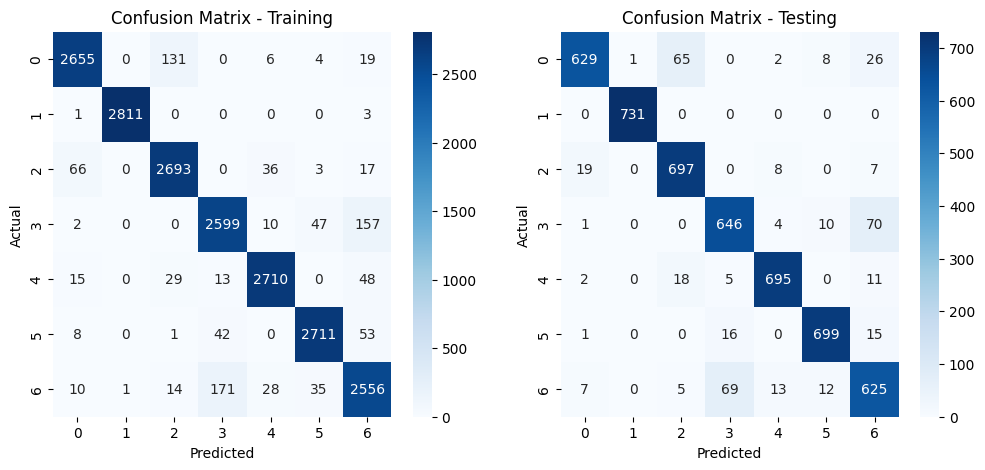

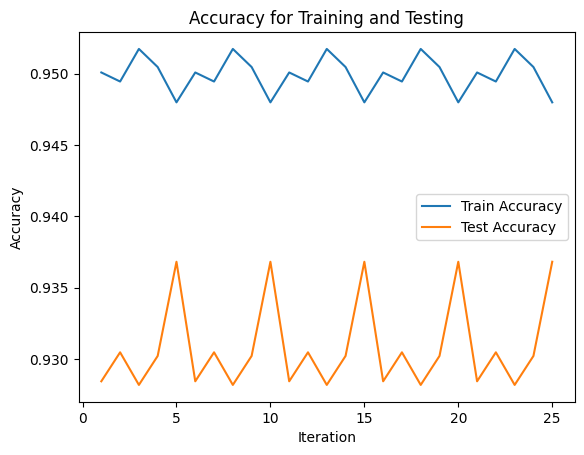

Training Accuracy: 0.947982745496067
Testing Accuracy: 0.9368180664805886


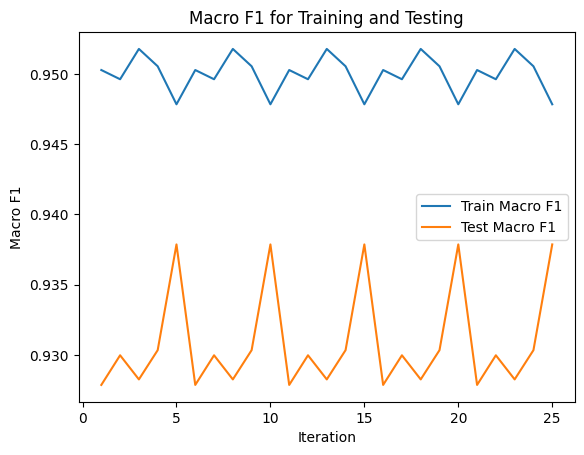

Training Macro F1 Score: 0.9478392546697976
Testing Macro F1 Score: 0.9378659105603243


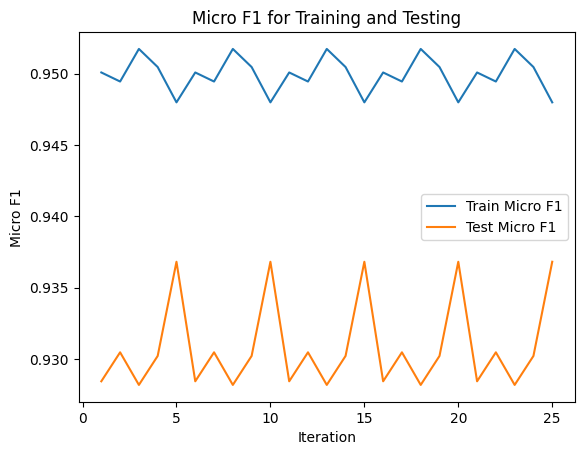

Training Micro F1 Score: 0.947982745496067
Testing Micro F1 Score: 0.9368180664805886


In [58]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Number of outer iterations
num_iterations = 5

# K-fold cross-validation
k = 5  # Number of folds

# Prepare lists to store metrics across iterations
accuracy_train_list = []
accuracy_test_list = []
macro_f1_train_list = []
macro_f1_test_list = []
micro_f1_train_list = []
micro_f1_test_list = []

# Train and test datasets with PCA features
X_train_pca = train_data_pca.iloc[:, :-1]
y_train_pca = train_data_pca.iloc[:, -1]

X_test_pca = test_data_pca.iloc[:, :-1]
y_test_pca = test_data_pca.iloc[:, -1]

# Outer loop for repeating cross-validation multiple times
for _ in range(num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Inner loop for cross-validation
    for train_index, val_index in kf.split(X_train_pca):
        # Split into training and validation sets
        X_train_fold = X_train_pca.iloc[train_index]
        y_train_fold = y_train_pca.iloc[train_index]

        X_val_fold = X_train_pca.iloc[val_index]
        y_val_fold = y_train_pca.iloc[val_index]

        # Create and train the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
        knn.fit(X_train_fold, y_train_fold)

        # Predictions for training and validation sets
        y_train_pred = knn.predict(X_train_fold)
        y_val_pred = knn.predict(X_val_fold)

        # Calculate metrics for training and validation sets
        accuracy_train = accuracy_score(y_train_fold, y_train_pred)
        macro_f1_train = f1_score(y_train_fold, y_train_pred, average='macro')
        micro_f1_train = f1_score(y_train_fold, y_train_pred, average='micro')

        accuracy_test = accuracy_score(y_val_fold, y_val_pred)
        macro_f1_test = f1_score(y_val_fold, y_val_pred, average='macro')
        micro_f1_test = f1_score(y_val_fold, y_val_pred, average='micro')

        # Store metrics in lists
        accuracy_train_list.append(accuracy_train)
        macro_f1_train_list.append(macro_f1_train)
        micro_f1_train_list.append(micro_f1_train)

        accuracy_test_list.append(accuracy_test)
        macro_f1_test_list.append(macro_f1_test)
        micro_f1_test_list.append(micro_f1_test)

        mean_accuracy_train = np.mean(accuracy_train_list)
        std_accuracy_train = np.std(accuracy_train_list)

# Retrain the model on the full training set
knn.fit(X_train_pca, y_train_pca)

# Predictions for the testing set
y_test_pred = knn.predict(X_test_pca)

# Calculate confusion matrices for training and testing
y_train_pred = knn.predict(X_train_pca)
confusion_train = confusion_matrix(y_train_pca, y_train_pred)
confusion_test = confusion_matrix(y_test_pca, y_test_pred)

# Plotting confusion matrices for training and testing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Correct range to match the length of the metric lists
x_values = range(1, len(accuracy_train_list) + 1)  # Adjust x range to match the list length

# Plotting accuracy for training and testing
plt.figure()
plt.plot(x_values, accuracy_train_list, label='Train Accuracy')
plt.plot(x_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel('Iteration')  # More appropriate label for the x-axis
plt.ylabel('Accuracy')
plt.title('Accuracy for Training and Testing')
plt.legend()
plt.show()
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# Plotting macro F1 scores for training and testing
plt.figure()
plt.plot(x_values, macro_f1_train_list, label='Train Macro F1')
plt.plot(x_values, macro_f1_test_list, label='Test Macro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Macro F1')
plt.title('Macro F1 for Training and Testing')
plt.legend()
plt.show()
print("Training Macro F1 Score:", macro_f1_train)
print("Testing Macro F1 Score:", macro_f1_test)

# Plotting micro F1 scores for training and testing
plt.figure()
plt.plot(x_values, micro_f1_train_list, label='Train Micro F1')
plt.plot(x_values, micro_f1_test_list, label='Test Micro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Micro F1')
plt.title('Micro F1 for Training and Testing')
plt.legend()
plt.show()
print("Training Micro F1 Score:", micro_f1_train)
print("Testing Micro F1 Score:", micro_f1_test)



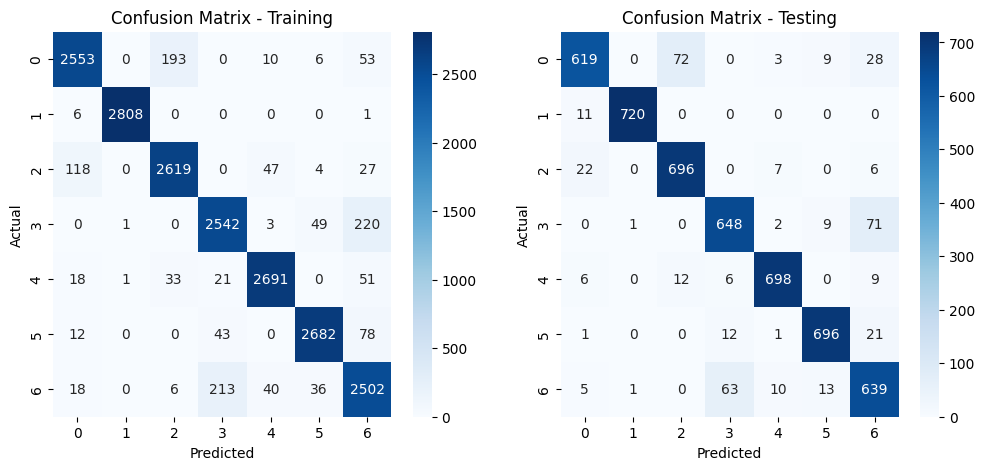

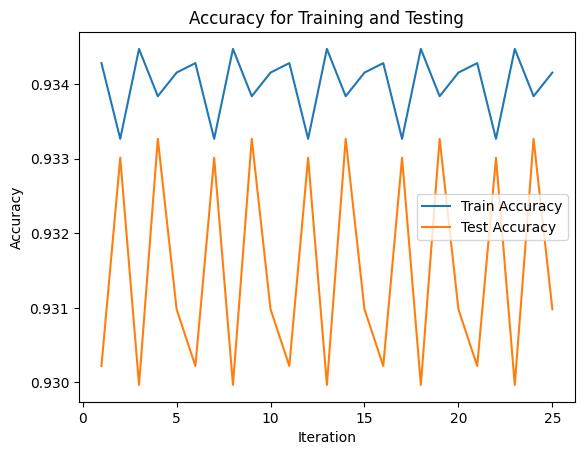

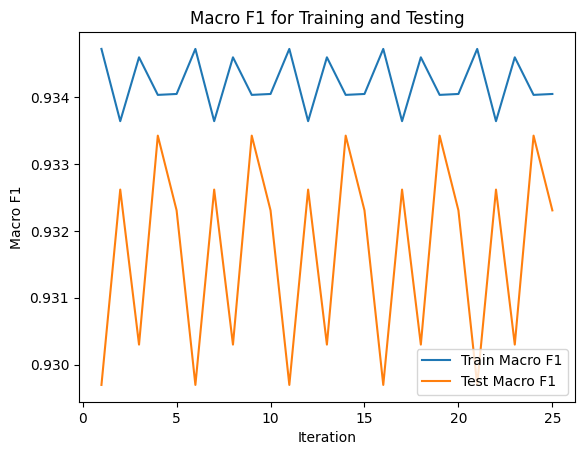

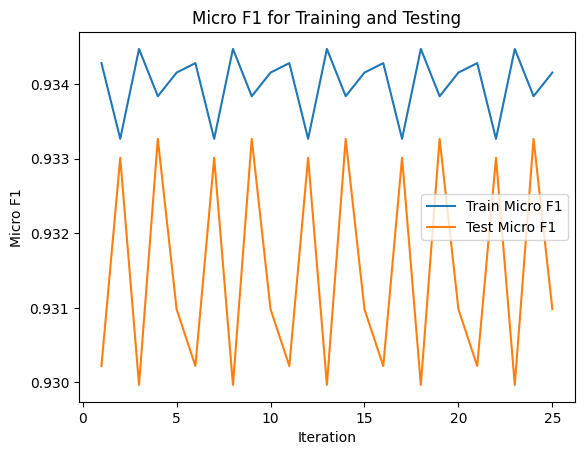

Training Accuracy: 0.9341537680791677
Testing Accuracy: 0.9309819842679523
Training Macro F1 Score: 0.9340454245474296
Testing Macro F1 Score: 0.9323055279032699
Training Micro F1 Score: 0.9341537680791677
Testing Micro F1 Score: 0.9309819842679523


In [59]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Number of outer iterations
num_iterations = 5

# K-fold cross-validation
k = 5  # Number of folds

# Prepare lists to store metrics across iterations
accuracy_train_list = []
accuracy_test_list = []
macro_f1_train_list = []
macro_f1_test_list = []
micro_f1_train_list = []
micro_f1_test_list = []

# Train and test datasets with PCA features
X_train_pca = train_data_pca.iloc[:, :-1]
y_train_pca = train_data_pca.iloc[:, -1]

X_test_pca = test_data_pca.iloc[:, :-1]
y_test_pca = test_data_pca.iloc[:, -1]

# Outer loop for repeating cross-validation multiple times
for _ in range(num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Inner loop for cross-validation
    for train_index, val_index in kf.split(X_train_pca):
        # Split into training and validation sets
        X_train_fold = X_train_pca.iloc[train_index]
        y_train_fold = y_train_pca.iloc[train_index]

        X_val_fold = X_train_pca.iloc[val_index]
        y_val_fold = y_train_pca.iloc[val_index]

        # Create and train the SVC classifier
        svc = SVC(kernel='linear')  # You can choose different kernels (e.g., 'rbf', 'poly', etc.)
        svc.fit(X_train_fold, y_train_fold)

        # Predictions for training and validation sets
        y_train_pred = svc.predict(X_train_fold)
        y_val_pred = svc.predict(X_val_fold)

        # Calculate metrics for training and validation sets
        accuracy_train = accuracy_score(y_train_fold, y_train_pred)
        macro_f1_train = f1_score(y_train_fold, y_train_pred, average='macro')
        micro_f1_train = f1_score(y_train_fold, y_train_pred, average='micro')

        accuracy_test = accuracy_score(y_val_fold, y_val_pred)
        macro_f1_test = f1_score(y_val_fold, y_val_pred, average='macro')
        micro_f1_test = f1_score(y_val_fold, y_val_pred, average='micro')

        # Store metrics in lists
        accuracy_train_list.append(accuracy_train)
        macro_f1_train_list.append(macro_f1_train)
        micro_f1_train_list.append(micro_f1_train)

        accuracy_test_list.append(accuracy_test)
        macro_f1_test_list.append(macro_f1_test)
        micro_f1_test_list.append(micro_f1_test)

        mean_accuracy_train = np.mean(accuracy_train_list)
        std_accuracy_train = np.std(accuracy_train_list)

# Retrain the model on the full training set
svc.fit(X_train_pca, y_train_pca)

# Predictions for the testing set
y_test_pred = svc.predict(X_test_pca)

# Calculate confusion matrices for training and testing
y_train_pred = svc.predict(X_train_pca)
confusion_train = confusion_matrix(y_train_pca, y_train_pred)
confusion_test = confusion_matrix(y_test_pca, y_test_pred)

# Plotting confusion matrices for training and testing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Correct range to match the length of the metric lists
x_values = range(1, len(accuracy_train_list) + 1)  # Adjust x range to match the list length

# Plotting accuracy for training and testing
plt.figure()
plt.plot(x_values, accuracy_train_list, label='Train Accuracy')
plt.plot(x_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel('Iteration')  # More appropriate label for the x-axis
plt.ylabel('Accuracy')
plt.title('Accuracy for Training and Testing')
plt.legend()
plt.show()

# Plotting macro F1 scores for training and testing
plt.figure()
plt.plot(x_values, macro_f1_train_list, label='Train Macro F1')
plt.plot(x_values, macro_f1_test_list, label='Test Macro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Macro F1')
plt.title('Macro F1 for Training and Testing')
plt.legend()
plt.show()

# Plotting micro F1 scores for training and testing
plt.figure()
plt.plot(x_values, micro_f1_train_list, label='Train Micro F1')
plt.plot(x_values, micro_f1_test_list, label='Test Micro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Micro F1')
plt.title('Micro F1 for Training and Testing')
plt.legend()
plt.show()

# Print all metrics and confusion matrices
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Training Macro F1 Score:", macro_f1_train)
print("Testing Macro F1 Score:", macro_f1_test)
print("Training Micro F1 Score:", micro_f1_train)
print("Testing Micro F1 Score:", micro_f1_test)


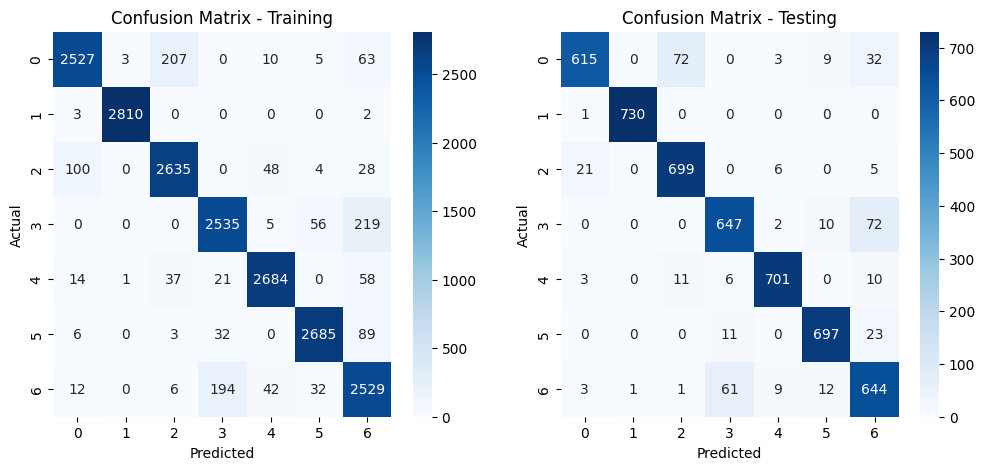

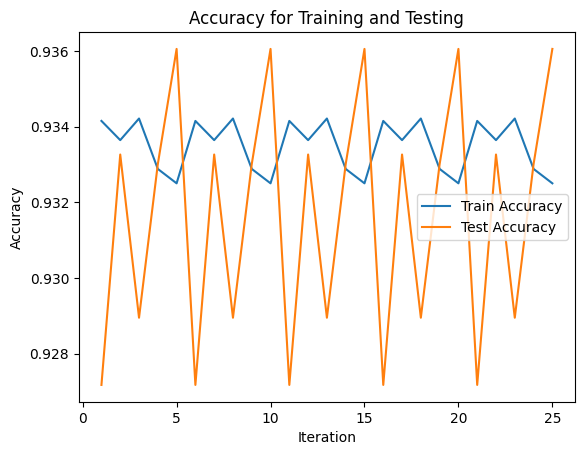

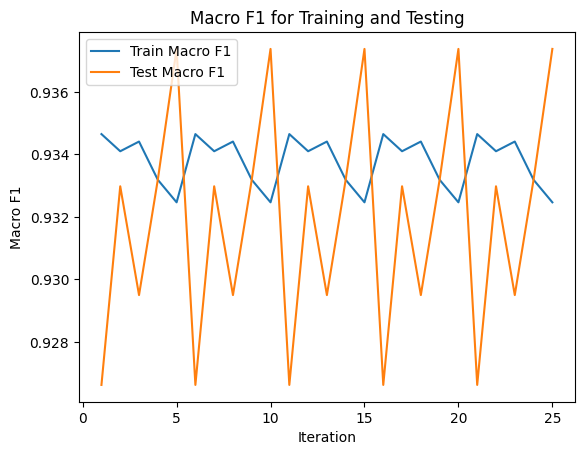

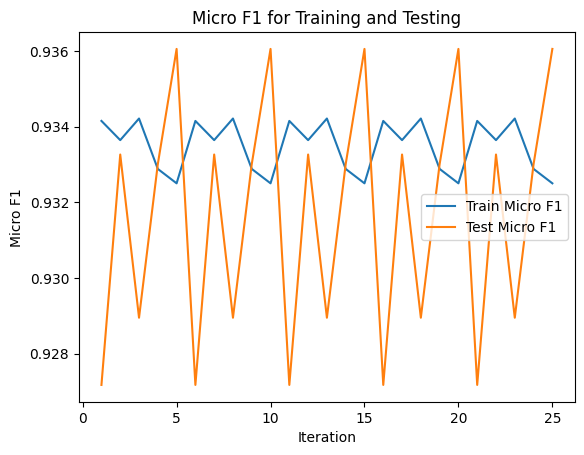

Training Accuracy: 0.9325044404973357
Testing Accuracy: 0.9360568383658969
Training Macro F1 Score: 0.9324654362792915
Testing Macro F1 Score: 0.9373745498864332
Training Micro F1 Score: 0.9325044404973357
Testing Micro F1 Score: 0.9360568383658969


In [60]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Number of outer iterations
num_iterations = 5

# K-fold cross-validation
k = 5  # Number of folds

# Prepare lists to store metrics across iterations
accuracy_train_list = []
accuracy_test_list = []
macro_f1_train_list = []
macro_f1_test_list = []
micro_f1_train_list = []
micro_f1_test_list = []

# Train and test datasets with PCA features
X_train_pca = train_data_pca.iloc[:, :-1]
y_train_pca = train_data_pca.iloc[:, -1]

X_test_pca = test_data_pca.iloc[:, :-1]
y_test_pca = test_data_pca.iloc[:, -1]

# Outer loop for repeating cross-validation multiple times
for _ in range(num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Inner loop for cross-validation
    for train_index, val_index in kf.split(X_train_pca):
        # Split into training and validation sets
        X_train_fold = X_train_pca.iloc[train_index]
        y_train_fold = y_train_pca.iloc[train_index]

        X_val_fold = X_train_pca.iloc[val_index]
        y_val_fold = y_train_pca.iloc[val_index]

        # Create and train the SVC classifier
        svc = SVC(kernel='rbf') 
        svc.fit(X_train_fold, y_train_fold)

        # Predictions for training and validation sets
        y_train_pred = svc.predict(X_train_fold)
        y_val_pred = svc.predict(X_val_fold)

        # Calculate metrics for training and validation sets
        accuracy_train = accuracy_score(y_train_fold, y_train_pred)
        macro_f1_train = f1_score(y_train_fold, y_train_pred, average='macro')
        micro_f1_train = f1_score(y_train_fold, y_train_pred, average='micro')

        accuracy_test = accuracy_score(y_val_fold, y_val_pred)
        macro_f1_test = f1_score(y_val_fold, y_val_pred, average='macro')
        micro_f1_test = f1_score(y_val_fold, y_val_pred, average='micro')

        # Store metrics in lists
        accuracy_train_list.append(accuracy_train)
        macro_f1_train_list.append(macro_f1_train)
        micro_f1_train_list.append(micro_f1_train)

        accuracy_test_list.append(accuracy_test)
        macro_f1_test_list.append(macro_f1_test)
        micro_f1_test_list.append(micro_f1_test)

        mean_accuracy_train = np.mean(accuracy_train_list)
        std_accuracy_train = np.std(accuracy_train_list)

# Retrain the model on the full training set
svc.fit(X_train_pca, y_train_pca)

# Predictions for the testing set
y_test_pred = svc.predict(X_test_pca)

# Calculate confusion matrices for training and testing
y_train_pred = svc.predict(X_train_pca)
confusion_train = confusion_matrix(y_train_pca, y_train_pred)
confusion_test = confusion_matrix(y_test_pca, y_test_pred)

# Plotting confusion matrices for training and testing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Correct range to match the length of the metric lists
x_values = range(1, len(accuracy_train_list) + 1)  # Adjust x range to match the list length

# Plotting accuracy for training and testing
plt.figure()
plt.plot(x_values, accuracy_train_list, label='Train Accuracy')
plt.plot(x_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel('Iteration')  # More appropriate label for the x-axis
plt.ylabel('Accuracy')
plt.title('Accuracy for Training and Testing')
plt.legend()
plt.show()

# Plotting macro F1 scores for training and testing
plt.figure()
plt.plot(x_values, macro_f1_train_list, label='Train Macro F1')
plt.plot(x_values, macro_f1_test_list, label='Test Macro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Macro F1')
plt.title('Macro F1 for Training and Testing')
plt.legend()
plt.show()

# Plotting micro F1 scores for training and testing
plt.figure()
plt.plot(x_values, micro_f1_train_list, label='Train Micro F1')
plt.plot(x_values, micro_f1_test_list, label='Test Micro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Micro F1')
plt.title('Micro F1 for Training and Testing')
plt.legend()
plt.show()

# Print all metrics and confusion matrices
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Training Macro F1 Score:", macro_f1_train)
print("Testing Macro F1 Score:", macro_f1_test)
print("Training Micro F1 Score:", micro_f1_train)
print("Testing Micro F1 Score:", micro_f1_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

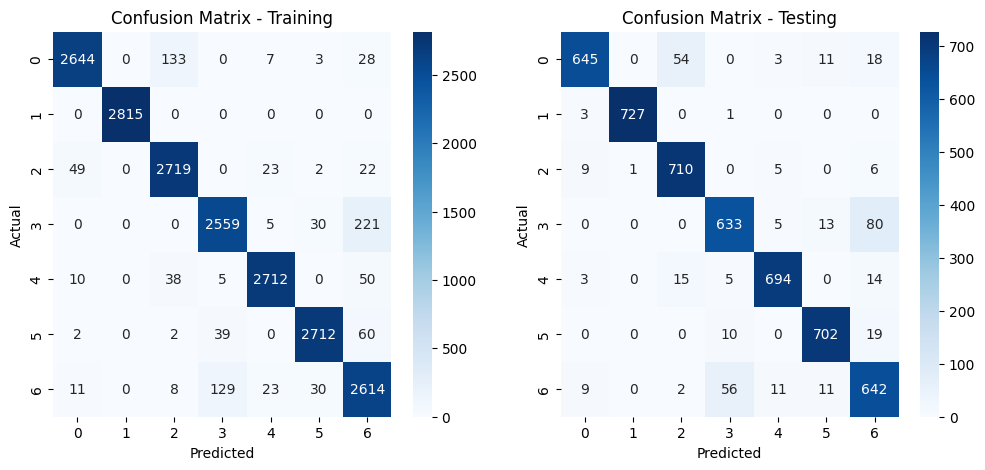

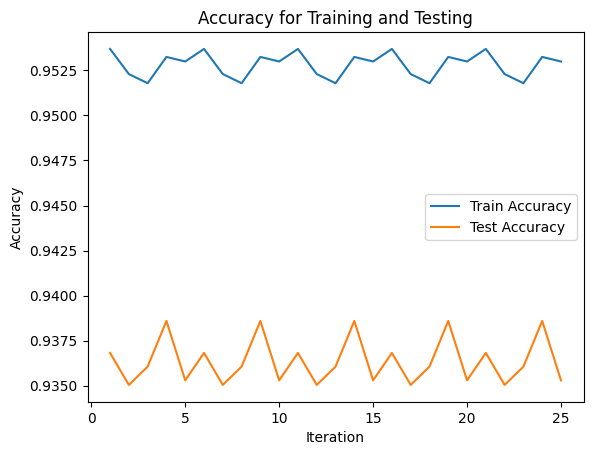

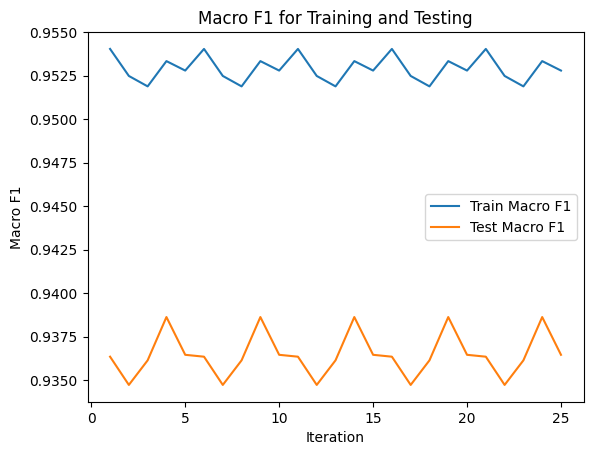

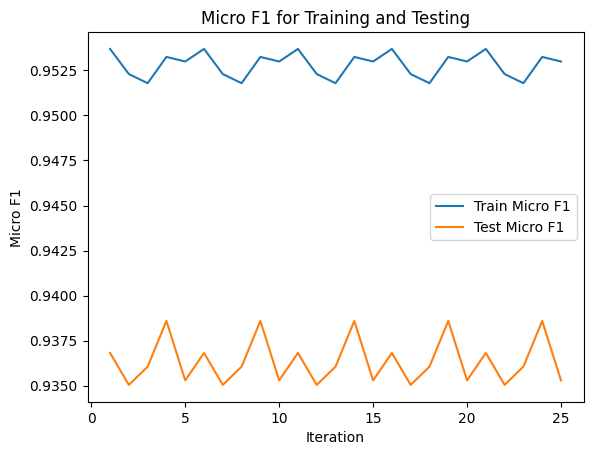

Training Accuracy: 0.9529941639177874
Testing Accuracy: 0.9352956102512052
Training Macro F1 Score: 0.9527982439890861
Testing Macro F1 Score: 0.9364597040601902
Training Micro F1 Score: 0.9529941639177874
Testing Micro F1 Score: 0.9352956102512052


In [61]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Number of outer iterations
num_iterations = 5

# K-fold cross-validation
k = 5  # Number of folds

# Prepare lists to store metrics across iterations
accuracy_train_list = []
accuracy_test_list = []
macro_f1_train_list = []
macro_f1_test_list = []
micro_f1_train_list = []
micro_f1_test_list = []

# Train and test datasets with PCA features
X_train_pca = train_data_pca.iloc[:, :-1]
y_train_pca = train_data_pca.iloc[:, -1]

X_test_pca = test_data_pca.iloc[:, :-1]
y_test_pca = test_data_pca.iloc[:, -1]

# Outer loop for repeating cross-validation multiple times
for _ in range(num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Inner loop for cross-validation
    for train_index, val_index in kf.split(X_train_pca):
        # Split into training and validation sets
        X_train_fold = X_train_pca.iloc[train_index]
        y_train_fold = y_train_pca.iloc[train_index]

        X_val_fold = X_train_pca.iloc[val_index]
        y_val_fold = y_train_pca.iloc[val_index]

        # Create and train the MLP classifier
        mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42) 
        mlp.fit(X_train_fold, y_train_fold)

        # Predictions for training and validation sets
        y_train_pred = mlp.predict(X_train_fold)
        y_val_pred = mlp.predict(X_val_fold)

        # Calculate metrics for training and validation sets
        accuracy_train = accuracy_score(y_train_fold, y_train_pred)
        macro_f1_train = f1_score(y_train_fold, y_train_pred, average='macro')
        micro_f1_train = f1_score(y_train_fold, y_train_pred, average='micro')

        accuracy_test = accuracy_score(y_val_fold, y_val_pred)
        macro_f1_test = f1_score(y_val_fold, y_val_pred, average='macro')
        micro_f1_test = f1_score(y_val_fold, y_val_pred, average='micro')

        # Store metrics in lists
        accuracy_train_list.append(accuracy_train)
        macro_f1_train_list.append(macro_f1_train)
        micro_f1_train_list.append(micro_f1_train)

        accuracy_test_list.append(accuracy_test)
        macro_f1_test_list.append(macro_f1_test)
        micro_f1_test_list.append(micro_f1_test)

# Retrain the model on the full training set
mlp.fit(X_train_pca, y_train_pca)

# Predictions for the testing set
y_test_pred = mlp.predict(X_test_pca)

# Calculate confusion matrices for training and testing
y_train_pred = mlp.predict(X_train_pca)
confusion_train = confusion_matrix(y_train_pca, y_train_pred)
confusion_test = confusion_matrix(y_test_pca, y_test_pred)

# Plotting confusion matrices for training and testing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Plotting accuracy for training and testing
plt.figure()
plt.plot(range(1, len(accuracy_train_list) + 1), accuracy_train_list, label='Train Accuracy')
plt.plot(range(1, len(accuracy_test_list) + 1), accuracy_test_list, label='Test Accuracy')
plt.xlabel('Iteration')  # X-axis label
plt.ylabel('Accuracy')
plt.title('Accuracy for Training and Testing')
plt.legend()
plt.show()

# Plotting macro F1 scores for training and testing
plt.figure()
plt.plot(range(1, len(accuracy_train_list) + 1), macro_f1_train_list, label='Train Macro F1')
plt.plot(range(1, len(accuracy_train_list) + 1), macro_f1_test_list, label='Test Macro F1')
plt.xlabel('Iteration')
plt.ylabel('Macro F1')
plt.title('Macro F1 for Training and Testing')
plt.legend()
plt.show()

# Plotting micro F1 scores for training and testing
plt.figure()
plt.plot(range(1, len(accuracy_train_list) + 1), micro_f1_train_list, label='Train Micro F1')
plt.plot(range(1, len(accuracy_train_list) + 1), micro_f1_test_list, label='Test Micro F1')
plt.xlabel('Iteration')
plt.ylabel('Micro F1')
plt.title('Micro F1 for Training and Testing')
plt.legend()
plt.show()

# Print all metrics and confusion matrices
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("Training Macro F1 Score:", macro_f1_train)
print("Testing Macro F1 Score:", macro_f1_test)
print("Training Micro F1 Score:", micro_f1_train)
print("Testing Micro F1 Score:", micro_f1_test)


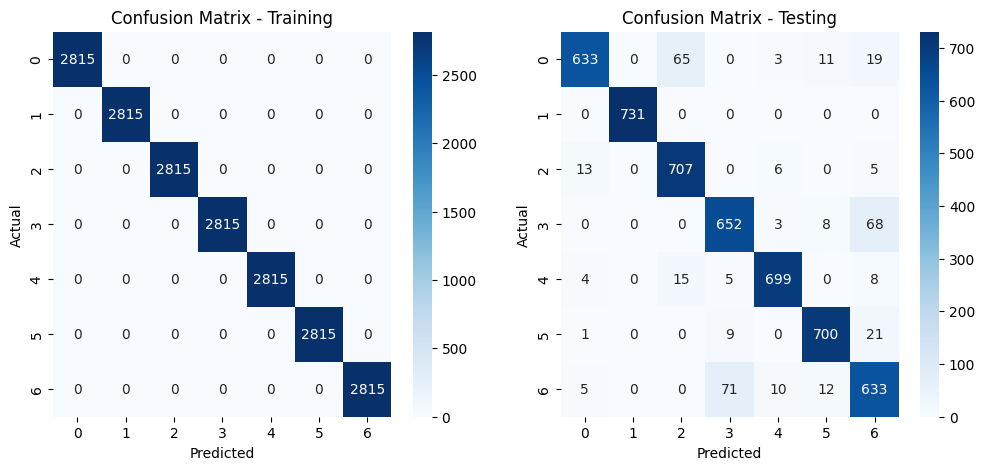

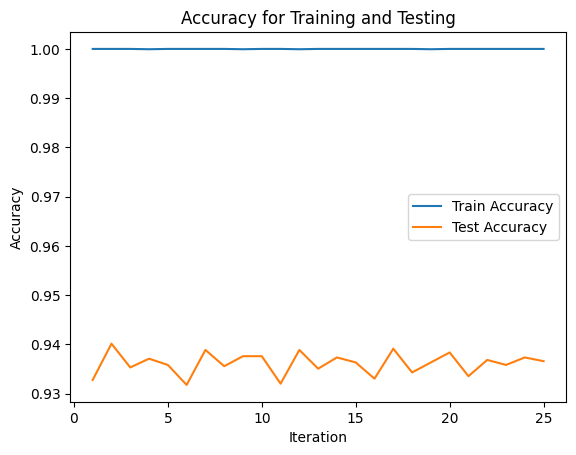

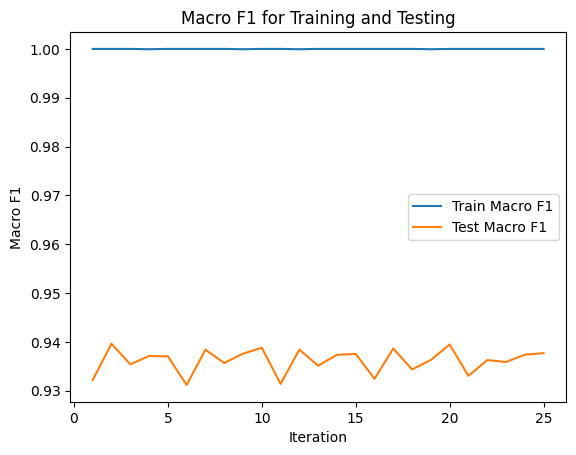

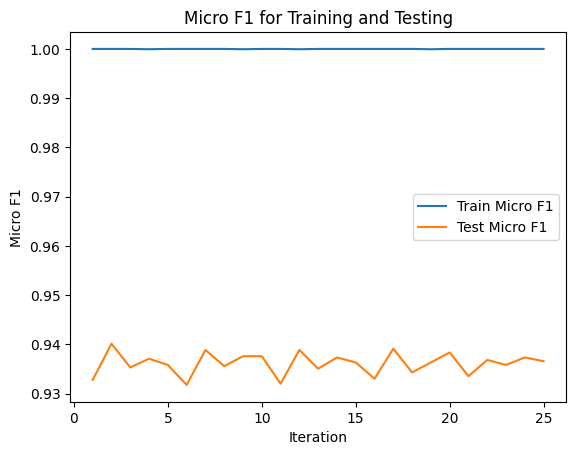

Training Accuracy: 0.999989850291804
Testing Accuracy: 0.9361177366150721
Training Macro F1 Score: 0.9999898463470216
Testing Macro F1 Score: 0.936158764794177
Training Micro F1 Score: 0.999989850291804
Testing Micro F1 Score: 0.9361177366150721


In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Number of outer iterations
num_iterations = 5

# K-fold cross-validation
k = 5  

# Prepare lists to store metrics across iterations
accuracy_train_list = []
accuracy_test_list = []
macro_f1_train_list = []
macro_f1_test_list = []
micro_f1_train_list = []
micro_f1_test_list = []

# Train and test datasets with PCA features
X_train_pca = train_data_pca.iloc[:, :-1]
y_train_pca = train_data_pca.iloc[:, -1]

X_test_pca = test_data_pca.iloc[:, :-1]
y_test_pca = test_data_pca.iloc[:, -1]

# Outer loop for repeating cross-validation multiple times
for _ in range(num_iterations):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Inner loop for cross-validation
    for train_index, val_index in kf.split(X_train_pca):
        # Split into training and validation sets
        X_train_fold = X_train_pca.iloc[train_index]
        y_train_fold = y_train_pca.iloc[train_index]

        X_val_fold = X_train_pca.iloc[val_index]
        y_val_fold = y_train_pca.iloc[val_index]

        # Create and train the Random Forest classifier
        rf = RandomForestClassifier() 
        rf.fit(X_train_fold, y_train_fold)

        # Predictions for training and validation sets
        y_train_pred = rf.predict(X_train_fold)
        y_val_pred = rf.predict(X_val_fold)

        # Calculate metrics for training and validation sets
        accuracy_train = accuracy_score(y_train_fold, y_train_pred)
        macro_f1_train = f1_score(y_train_fold, y_train_pred, average='macro')
        micro_f1_train = f1_score(y_train_fold, y_train_pred, average='micro')

        accuracy_test = accuracy_score(y_val_fold, y_val_pred)
        macro_f1_test = f1_score(y_val_fold, y_val_pred, average='macro')
        micro_f1_test = f1_score(y_val_fold, y_val_pred, average='micro')

        # Store metrics in lists
        accuracy_train_list.append(accuracy_train)
        macro_f1_train_list.append(macro_f1_train)
        micro_f1_train_list.append(micro_f1_train)

        accuracy_test_list.append(accuracy_test)
        macro_f1_test_list.append(macro_f1_test)
        micro_f1_test_list.append(micro_f1_test)

# Retrain the model on the full training set
rf.fit(X_train_pca, y_train_pca)

# Predictions for the testing set
y_test_pred = rf.predict(X_test_pca)

# Calculate confusion matrices for training and testing
y_train_pred = rf.predict(X_train_pca)
confusion_train = confusion_matrix(y_train_pca, y_train_pred)
confusion_test = confusion_matrix(y_test_pca, y_test_pred)

# Plotting confusion matrices for training and testing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Testing')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Plotting accuracy for training and testing
x_values = range(1, len(accuracy_train_list) + 1)  # Adjust x range to match the list length
plt.figure()
plt.plot(x_values, accuracy_train_list, label='Train Accuracy')
plt.plot(x_values, accuracy_test_list, label='Test Accuracy')
plt.xlabel('Iteration')  # More appropriate label for the x-axis
plt.ylabel('Accuracy')
plt.title('Accuracy for Training and Testing')
plt.legend()
plt.show()

# Plotting macro F1 scores for training and testing
plt.figure()
plt.plot(x_values, macro_f1_train_list, label='Train Macro F1')
plt.plot(x_values, macro_f1_test_list, label='Test Macro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Macro F1')
plt.title('Macro F1 for Training and Testing')
plt.legend()
plt.show()

# Plotting micro F1 scores for training and testing
plt.figure()
plt.plot(x_values, micro_f1_train_list, label='Train Micro F1')
plt.plot(x_values, micro_f1_test_list, label='Test Micro F1')
plt.xlabel('Iteration')  # Corrected x-axis label
plt.ylabel('Micro F1')
plt.title('Micro F1 for Training and Testing')
plt.legend()
plt.show()

# Print all metrics and confusion matrices
print("Training Accuracy:", np.mean(accuracy_train_list))
print("Testing Accuracy:", np.mean(accuracy_test_list))
print("Training Macro F1 Score:", np.mean(macro_f1_train_list))
print("Testing Macro F1 Score:", np.mean(macro_f1_test_list))
print("Training Micro F1 Score:", np.mean(micro_f1_train_list))
print("Testing Micro F1 Score:", np.mean(micro_f1_test_list))
